In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px

In [2]:
df = pd.read_csv('ds_jobs.csv') # reading the data
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


# Analysis average salary vs skills

Analysis the average salary offered and its correlation to the skills demanded. For skills, we are considering technical skills like python, spark, aws, etc. 

In [3]:
# Creating a skills list to see their correlation with the average salary offered
# Creating a dataset from the previous data, with the total amount of skills asked on the job description
# Adding the average salary offered
skills_list = ['python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']
df_skills = df[skills_list]
df_skills['total'] = df_skills.sum(axis=1)
df_skills['avg_salary'] = df['avg_salary']

C:\Users\Anakz\AppData\Local\Temp\ipykernel_16996\150304833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skills['total'] = df_skills.sum(axis=1)
C:\Users\Anakz\AppData\Local\Temp\ipykernel_16996\150304833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skills['avg_salary'] = df['avg_salary']


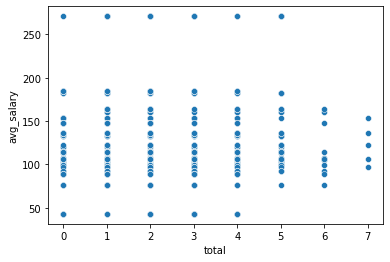

In [4]:
# Total amount the skills asked for vs average salary offered
scatterplot = sns.scatterplot(data=df_skills,x='total',y='avg_salary')
fig = scatterplot.get_figure()
fig.savefig("Scatter total vs avg salary.png") 

These graphs states that high salary job offers don't necessarily ask for knowledge of a lot of skills. On the contrary, it stats that lower salary jobs wants to make sure that the candidates knows all those skills. 

<AxesSubplot:>

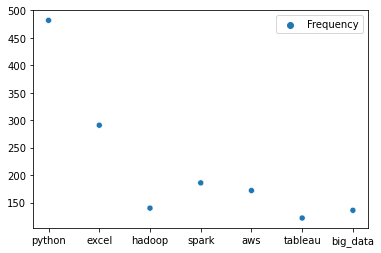

In [5]:
# Frequency that a specific skill is asked 

#Scatterplot
frequency_list =[]
for skill in skills_list:
    frequency_list.append(df_skills[skill].sum())
df_total_skills = pd.DataFrame({'Frequency':frequency_list}, index=skills_list)
sns.scatterplot(data=df_total_skills)

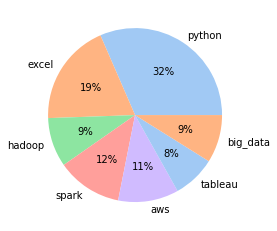

In [6]:
#Pie chart for individual skills 
colors = sns.color_palette('pastel')[0:5]
plt.pie(frequency_list, labels=skills_list, colors = colors, autopct='%.0f%%')
plt.show()

We can see the skill in demand is python, being followed by excel. Python is a skill 3 times more commonly demanded as most of the other skills.

C:\Users\Anakz\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


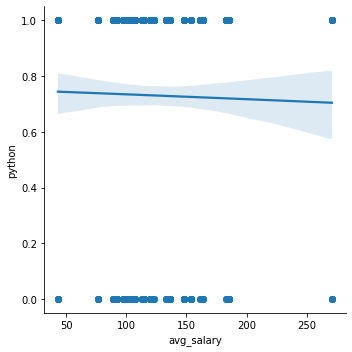

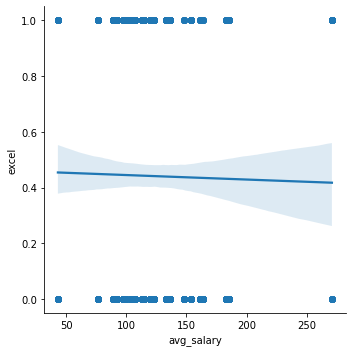

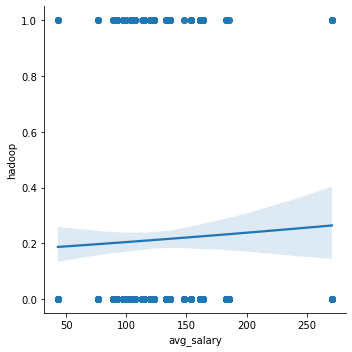

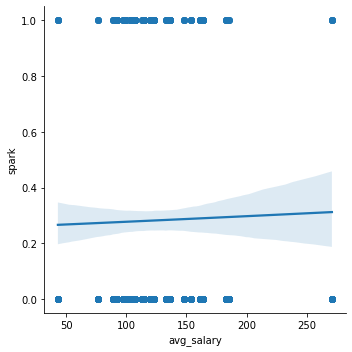

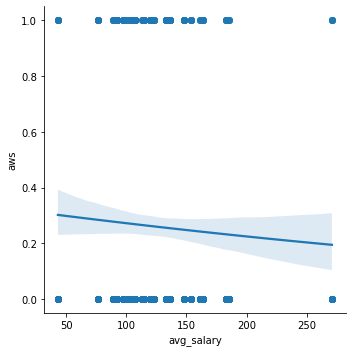

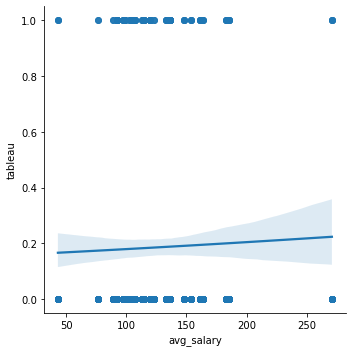

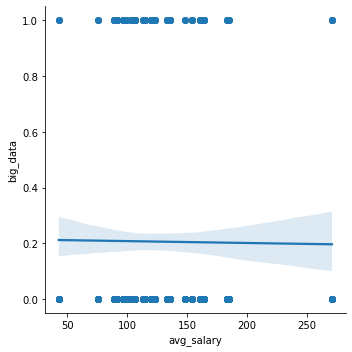

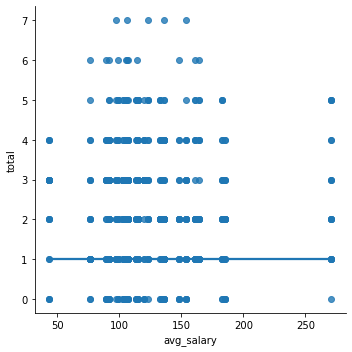

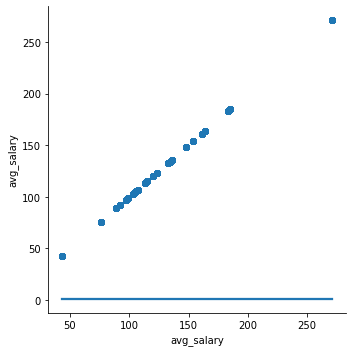

In [7]:
# Creating graphs to see any kind of relation between features and the targert variable:
for skill in df_skills:
    sns.lmplot(x="avg_salary", y=skill, data=df_skills, logistic= True)

Here the graphs point at the direction that maybe there is no correlation at all between average salary offered and the skill asked by the employer.

# Creating a model

In [8]:
# Split between train/test sets
X = df_skills.loc[:,skills_list] 
y = df.loc[:,'avg_salary'] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [27]:
# Using Linear Regression to create the model
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 
print(" Linear Regression Model scores")
print(" Score of Train : {}\n Score of Test : {}".format(round(regressor.score(X_train, y_train),3), round(regressor.score(X_test, y_test),3)))

 Linear Regression Model scores
 Score of Train : 0.01
 Score of Test : -0.026


A coeffficient like this means that the linear model created doesnt describe at all with the dataset.

In [21]:
# Using Linear Regression to create the model
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 
print(" Logistic Regression Model scores")
print(" Score of Train : {}\n Score of Test : {}".format(round(classifier.score(X_train, y_train),3), round(classifier.score(X_test, y_test),3)))

 Logistic Regression Model scores
 Score of Train : 0.119
 Score of Test : 0.061
